In [2]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#propios utilitarios
from utils import *
from graphs import *

data = pd.read_csv('data/01dataBaseTrainTrxRec.csv', **set_parameter_csv)
data.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386


In [3]:
data.astype('str').describe(include='all')

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
count,1591617,1591617,1591617,1591617,1591617,1591617,1591617,1591617
unique,365,30000,223,74339,2,422,22,723645
top,2017-07-15 00:00:00,21426,75.0,24539,1,175.0,1,0.08333333333333333
freq,7303,730,322667,12644,1286691,173180,1499771,309


In [4]:
data['ratingMonto'].describe()

count    1.591617e+06
mean     1.318383e-02
std      3.236438e-02
min      2.984905e-06
25%      1.598366e-03
50%      4.199563e-03
75%      1.152572e-02
max      1.000000e+00
Name: ratingMonto, dtype: float64

## Analisis de nulos

In [5]:
#Validacion de que los mismos que tienen nulos los codgios de giro tambien tienen nulo su ubigeo
data[data['ubigeoEstab'].isnull() & data['codGiro'].isnull()].shape[0] == \
    data[data['ubigeoEstab'].isnull()].shape[0]

True

In [6]:
#Por ello completo nulos con un tipo nuevo de dato comun a ambos
data.fillna(0, inplace=True)

In [7]:
null_verificator(data)

'DATA LIMPIA DE NULOS'

In [8]:
data['codGiro'] = data['codGiro'].astype(int)
data['ubigeoEstab'] = data['ubigeoEstab'].astype(int)

In [9]:
data.dtypes

fechaOper             object
codCliente             int64
codGiro                int64
codEstab               int64
flagLimaProvEstab      int64
ubigeoEstab            int64
ctdTrx                 int64
ratingMonto          float64
dtype: object

In [10]:
data.shape, data.columns

((1591617, 8),
 Index(['fechaOper', 'codCliente', 'codGiro', 'codEstab', 'flagLimaProvEstab',
        'ubigeoEstab', 'ctdTrx', 'ratingMonto'],
       dtype='object'))

## Creando Dataframe de datos solo de establecimiento

In [12]:
data_estab = data.drop(['codCliente','ratingMonto', 'ctdTrx', 'fechaOper'], axis=1)
data_estab = data_estab.drop_duplicates()
data_estab = data_estab.sort_values(by=['codEstab']).reset_index()
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab
0,398126,0,1,0,0
1,9507,0,2,0,0
2,142715,100,3,1,166
3,568696,100,4,1,401
4,1250161,100,5,1,175


In [13]:
data_estab.dtypes

index                int64
codGiro              int64
codEstab             int64
flagLimaProvEstab    int64
ubigeoEstab          int64
dtype: object

## Analizando Ubigeo (422 categorias)

In [52]:
data_ubigeo = pd.DataFrame(data['ubigeoEstab'].value_counts(dropna=False))
data_ubigeo['count'] = data_ubigeo['ubigeoEstab']
data_ubigeo['ubigeoEstab'] = data_ubigeo.index
data_ubigeo['ubigeoEstab'] = data_ubigeo['ubigeoEstab'].apply(lambda x: str(x))
data_ubigeo = data_ubigeo.reset_index()
del data_ubigeo['index']
data_ubigeo.head(5)

,codGiro,count
0,75,322667
1,110,237279
2,112,143592
3,85,120829
4,114,104896


In [45]:
total_visit = sum(data_ubigeo['count'])
data_ubigeo['estab_popularity'] = data_ubigeo['count'].apply(lambda x: x/total_visit)
data_ubigeo.head()

,ubigeoEstab,count,estab_popularity
0,175,173180,0.108808
1,157,171381,0.107677
2,166,118251,0.074296
3,0,92686,0.058234
4,165,87808,0.055169


In [49]:
data_estab = data_estab.merge(data_ubigeo, on='ubigeoEstab')
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,count,estab_popularity
0,398126,0,1,0,0,92686,0.058234
1,9507,0,2,0,0,92686,0.058234
2,1206320,0,14,0,0,92686,0.058234
3,43372,0,24,0,0,92686,0.058234
4,659498,0,25,0,0,92686,0.058234


In [50]:
del data_ubigeo
del data_estab['count']
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity
0,398126,0,1,0,0,0.058234
1,9507,0,2,0,0,0.058234
2,1206320,0,14,0,0,0.058234
3,43372,0,24,0,0,0.058234
4,659498,0,25,0,0,0.058234


## Analizando CodGiro (223 categorias)

In [53]:
data_giro = pd.DataFrame(data['codGiro'].value_counts(dropna=False))
data_giro['count'] = data_giro['codGiro']
data_giro['codGiro'] = data_giro.index
data_giro['codGiro'] = data_giro['codGiro'].apply(lambda x: int(x))
data_giro = data_giro.reset_index()
del data_giro['index']
data_giro.head()

,codGiro,count
0,75,322667
1,110,237279
2,112,143592
3,85,120829
4,114,104896


In [54]:
total_visit = sum(data_giro['count'])
data_giro['giro_popularity'] = data_giro['count'].apply(lambda x: x/total_visit)
data_giro.head()

,codGiro,count,giro_popularity
0,75,322667,0.202729
1,110,237279,0.149080
2,112,143592,0.090218
3,85,120829,0.075916
4,114,104896,0.065905


In [55]:
data_estab = data_estab.merge(data_giro, on='codGiro')
del data_giro
del data_estab['count']
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity
0,398126,0,1,0,0,0.058234,0.058234
1,9507,0,2,0,0,0.058234,0.058234
2,1206320,0,14,0,0,0.058234,0.058234
3,43372,0,24,0,0,0.058234,0.058234
4,659498,0,25,0,0,0.058234,0.058234


In [58]:
data_estab[data_estab['estab_popularity'] == data_estab['giro_popularity']].shape

(18857, 7)

In [76]:
estab_rant =  data.groupby(by='ubigeoEstab')[['ubigeoEstab', 'ratingMonto']].mean()
del estab_rant.index.name
estab_rant['estab_rant'] = estab_rant['ratingMonto']
del estab_rant['ratingMonto']
estab_rant = estab_rant.reset_index()
del estab_rant['index']
estab_rant.head()

,ubigeoEstab,estab_rant
0,0,0.018220
1,2,0.023166
2,3,0.021787
3,4,0.009799
4,5,0.011706


In [77]:
data_estab = data_estab.merge(estab_rant, on='ubigeoEstab')
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant
0,398126,0,1,0,0,0.058234,0.058234,0.01822
1,9507,0,2,0,0,0.058234,0.058234,0.01822
2,1206320,0,14,0,0,0.058234,0.058234,0.01822
3,43372,0,24,0,0,0.058234,0.058234,0.01822
4,659498,0,25,0,0,0.058234,0.058234,0.01822


In [78]:
del estab_rant
giro_rant =  data.groupby(by='codGiro')[['codGiro', 'ratingMonto']].mean()
del giro_rant.index.name
giro_rant['giro_rant'] = giro_rant['ratingMonto']
del giro_rant['ratingMonto']
giro_rant = giro_rant.reset_index()
del giro_rant['index']
giro_rant.head()

,codGiro,giro_rant
0,0,0.018220
1,2,0.081935
2,3,0.029530
3,4,0.025223
4,5,0.000992


In [79]:
data_estab = data_estab.merge(giro_rant, on='codGiro')
del giro_rant
data_estab.head()

,index,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant
0,398126,0,1,0,0,0.058234,0.058234,0.01822,0.01822
1,9507,0,2,0,0,0.058234,0.058234,0.01822,0.01822
2,1206320,0,14,0,0,0.058234,0.058234,0.01822,0.01822
3,43372,0,24,0,0,0.058234,0.058234,0.01822,0.01822
4,659498,0,25,0,0,0.058234,0.058234,0.01822,0.01822


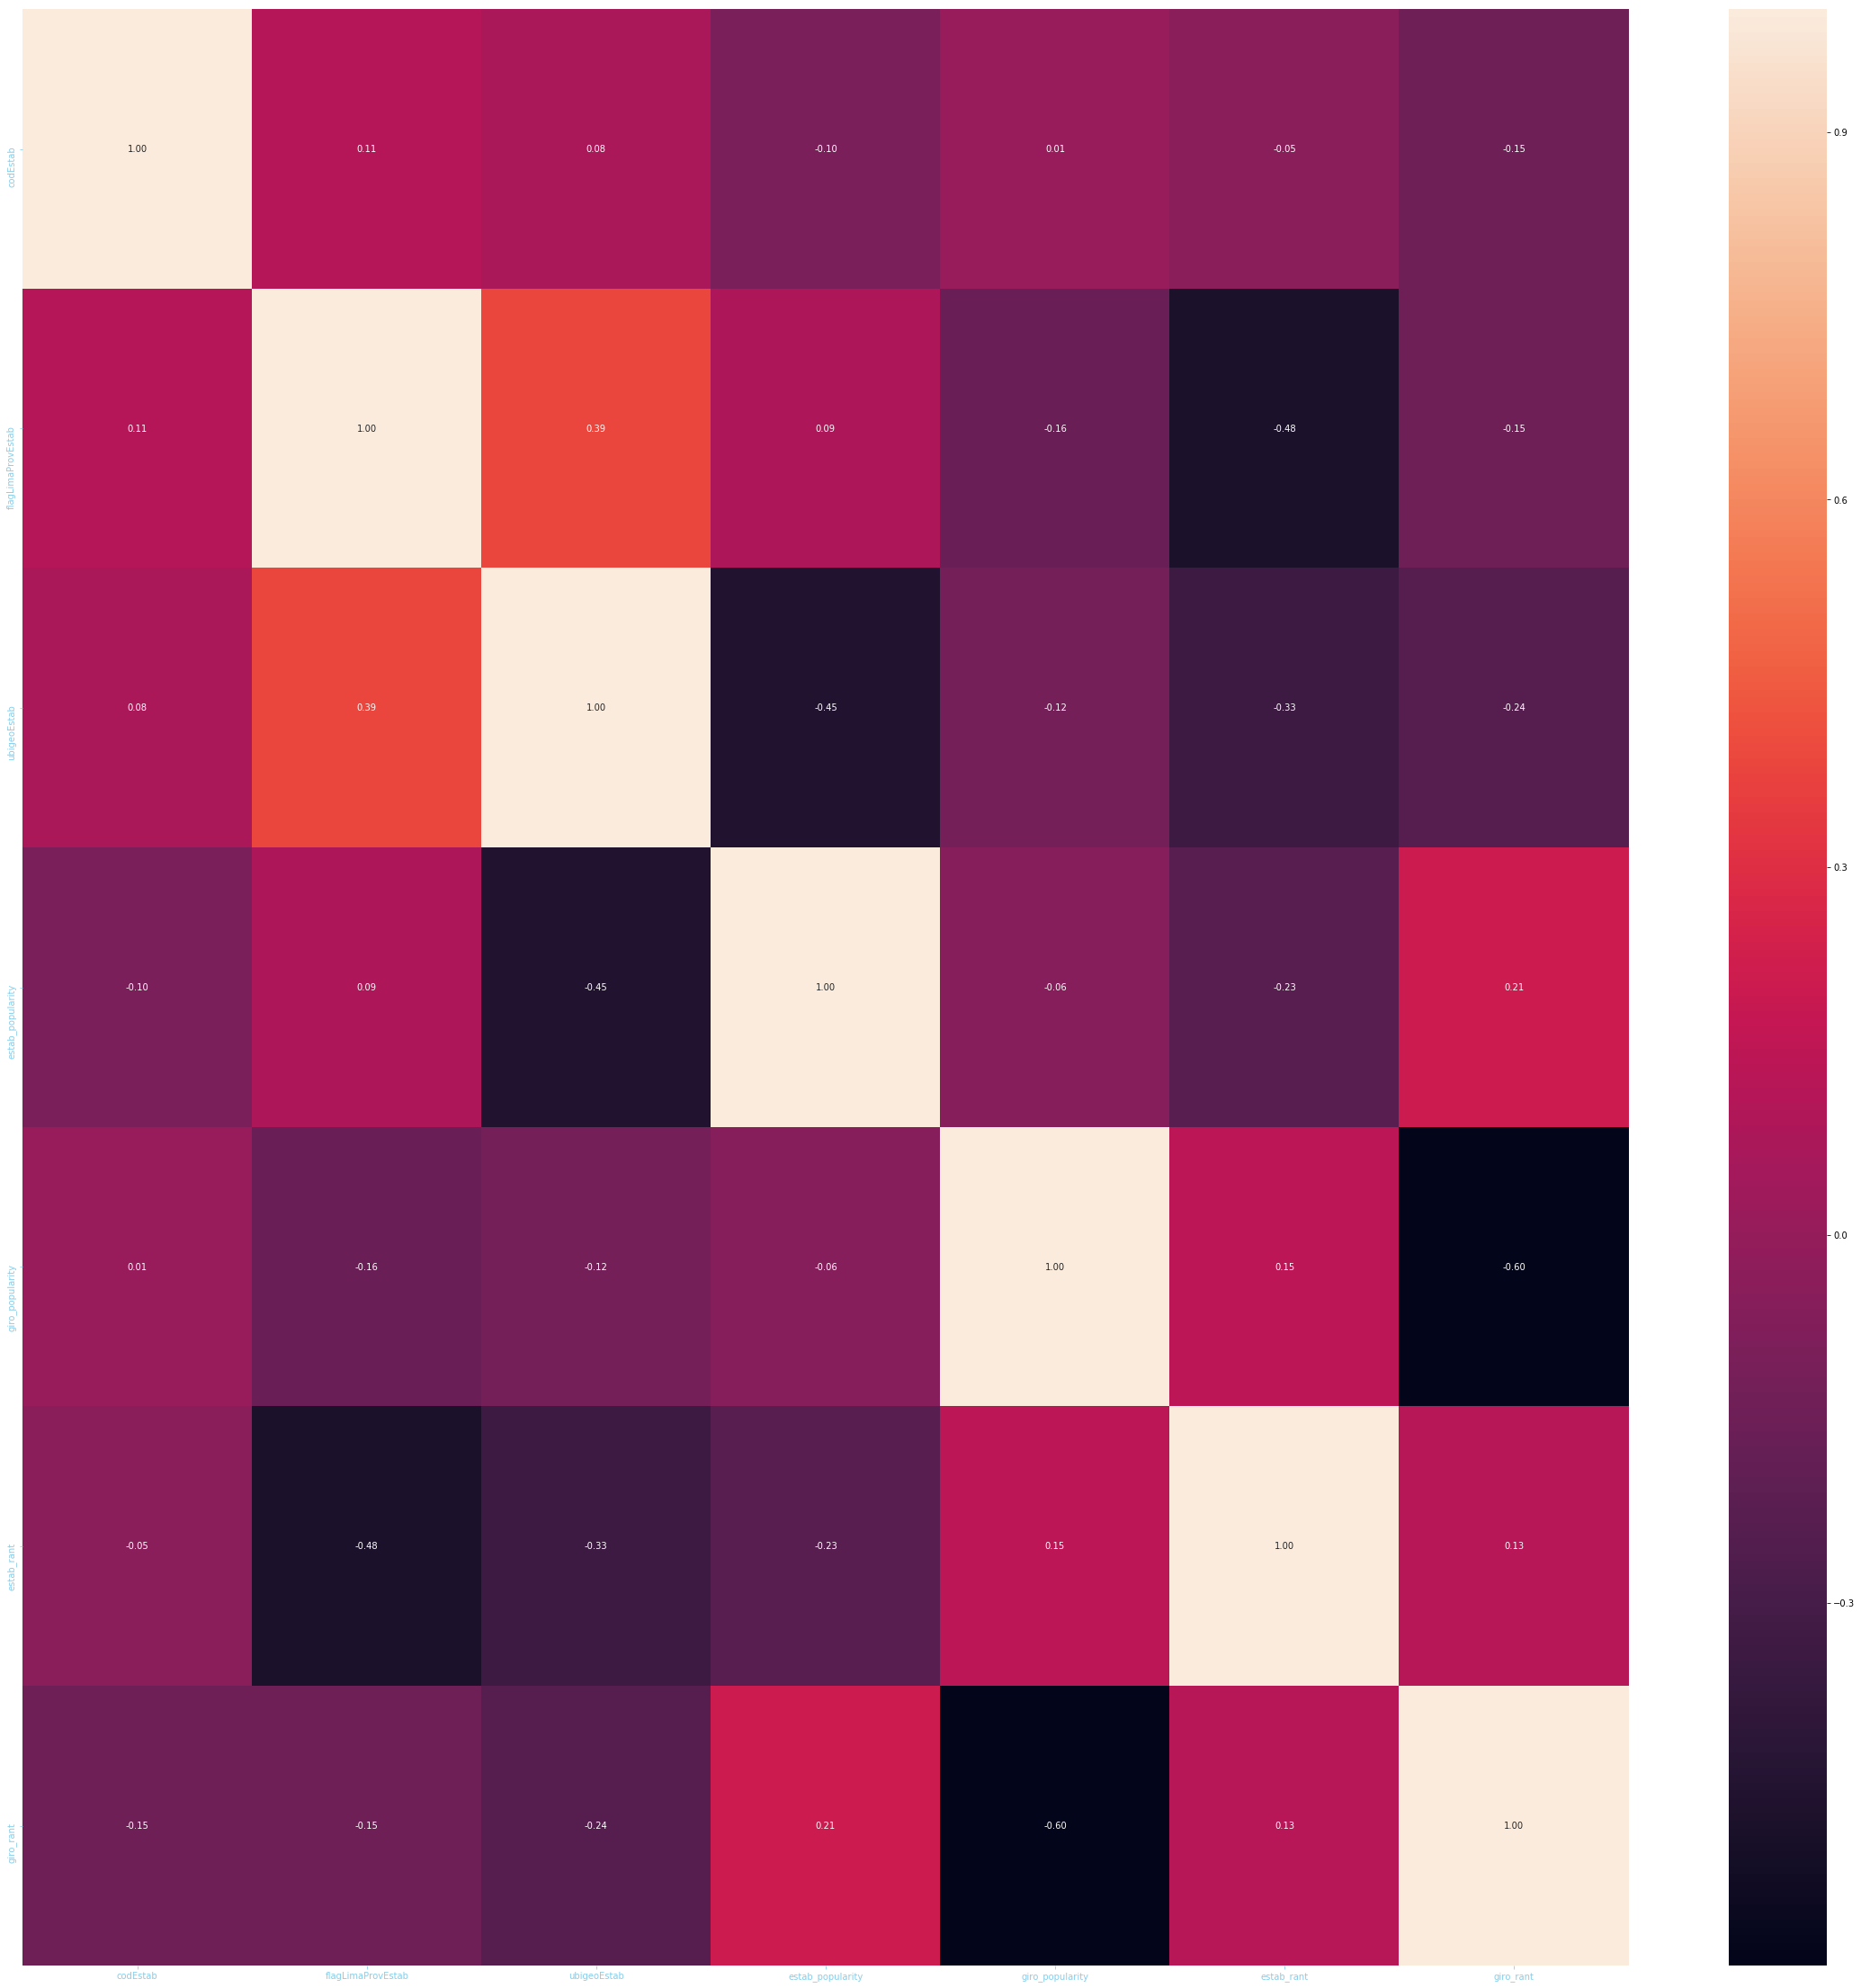

In [82]:
if 'index' in list(data_estab.columns):
    del data_estab['index']

del data_estab['codGiro']
fig, ax = plt.subplots(figsize=(40, 40))
graf = sns.heatmap(data_estab.corr('spearman'), annot=True, fmt=".2f", ax=ax)
graf.xaxis.label.set_color('skyblue')
graf.yaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')
graf.figure.savefig("img/data_estab.png")

In [86]:
# Guardo la informacion del establecimiento
data_estab.to_csv('data_estab.csv', index=False)

## Trabajando mi data TRAIN

In [87]:
data_train = data[['codCliente','codEstab', 'ratingMonto', 'fechaOper']]
data_train.head()

,codCliente,codEstab,ratingMonto,fechaOper
0,7649,43629,0.014072,2017-01-29 00:00:00
1,24604,4326,0.001667,2016-12-01 00:00:00
2,15289,4326,0.000127,2017-06-01 00:00:00
3,5190,59776,0.001167,2017-09-22 00:00:00
4,16635,31043,0.047386,2017-05-05 00:00:00


## ANALIZANDO FECHA

In [88]:
del data
data_train['fechaOper'] = data_train['fechaOper'].astype(str).apply(lambda x: x.split()[0])
data_train.head()

/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,codCliente,codEstab,ratingMonto,fechaOper
0,7649,43629,0.014072,2017-01-29
1,24604,4326,0.001667,2016-12-01
2,15289,4326,0.000127,2017-06-01
3,5190,59776,0.001167,2017-09-22
4,16635,31043,0.047386,2017-05-05


In [89]:
add_col_dates(data_train, 'fechaOper', format_match="%Y-%m-%d", month_day=False)

/home/villacorta/STORAGE/codeando/machine_learning/_bbva data challeneger 2018/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['date'] = pd.to_datetime(data[col], format=format_match)
/home/villacorta/STORAGE/codeando/machine_learning/_bbva data challeneger 2018/utils.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['month'] = pd.to_numeric(data['date'].dt.strftime('%m'), errors='coerce')
/home/villacorta/STORAGE/codeando/machine_learning/_bbva data challeneger 2018/utils.py:65: SettingWithCopyWarning: 
A value is t

,codCliente,codEstab,ratingMonto,fechaOper,date,month,day,year,weekday
0,7649,43629,0.014072,2017-01-29,2017-01-29,1,29,2017,0
1,24604,4326,0.001667,2016-12-01,2016-12-01,12,1,2016,4
2,15289,4326,0.000127,2017-06-01,2017-06-01,6,1,2017,4
3,5190,59776,0.001167,2017-09-22,2017-09-22,9,22,2017,5
4,16635,31043,0.047386,2017-05-05,2017-05-05,5,5,2017,5
5,1578,41706,0.019062,2017-08-28,2017-08-28,8,28,2017,1
6,18185,24590,0.001747,2017-07-19,2017-07-19,7,19,2017,3
7,10836,230,0.008692,2016-12-01,2016-12-01,12,1,2016,4
8,11467,5561,0.011116,2017-07-20,2017-07-20,7,20,2017,4
9,9763,826,0.032054,2017-08-24,2017-08-24,8,24,2017,4


In [91]:
del data_train['date']
del data_train['fechaOper']
data_train.head()

,codCliente,codEstab,ratingMonto,month,day,year,weekday
0,7649,43629,0.014072,1,29,2017,0
1,24604,4326,0.001667,12,1,2016,4
2,15289,4326,0.000127,6,1,2017,4
3,5190,59776,0.001167,9,22,2017,5
4,16635,31043,0.047386,5,5,2017,5


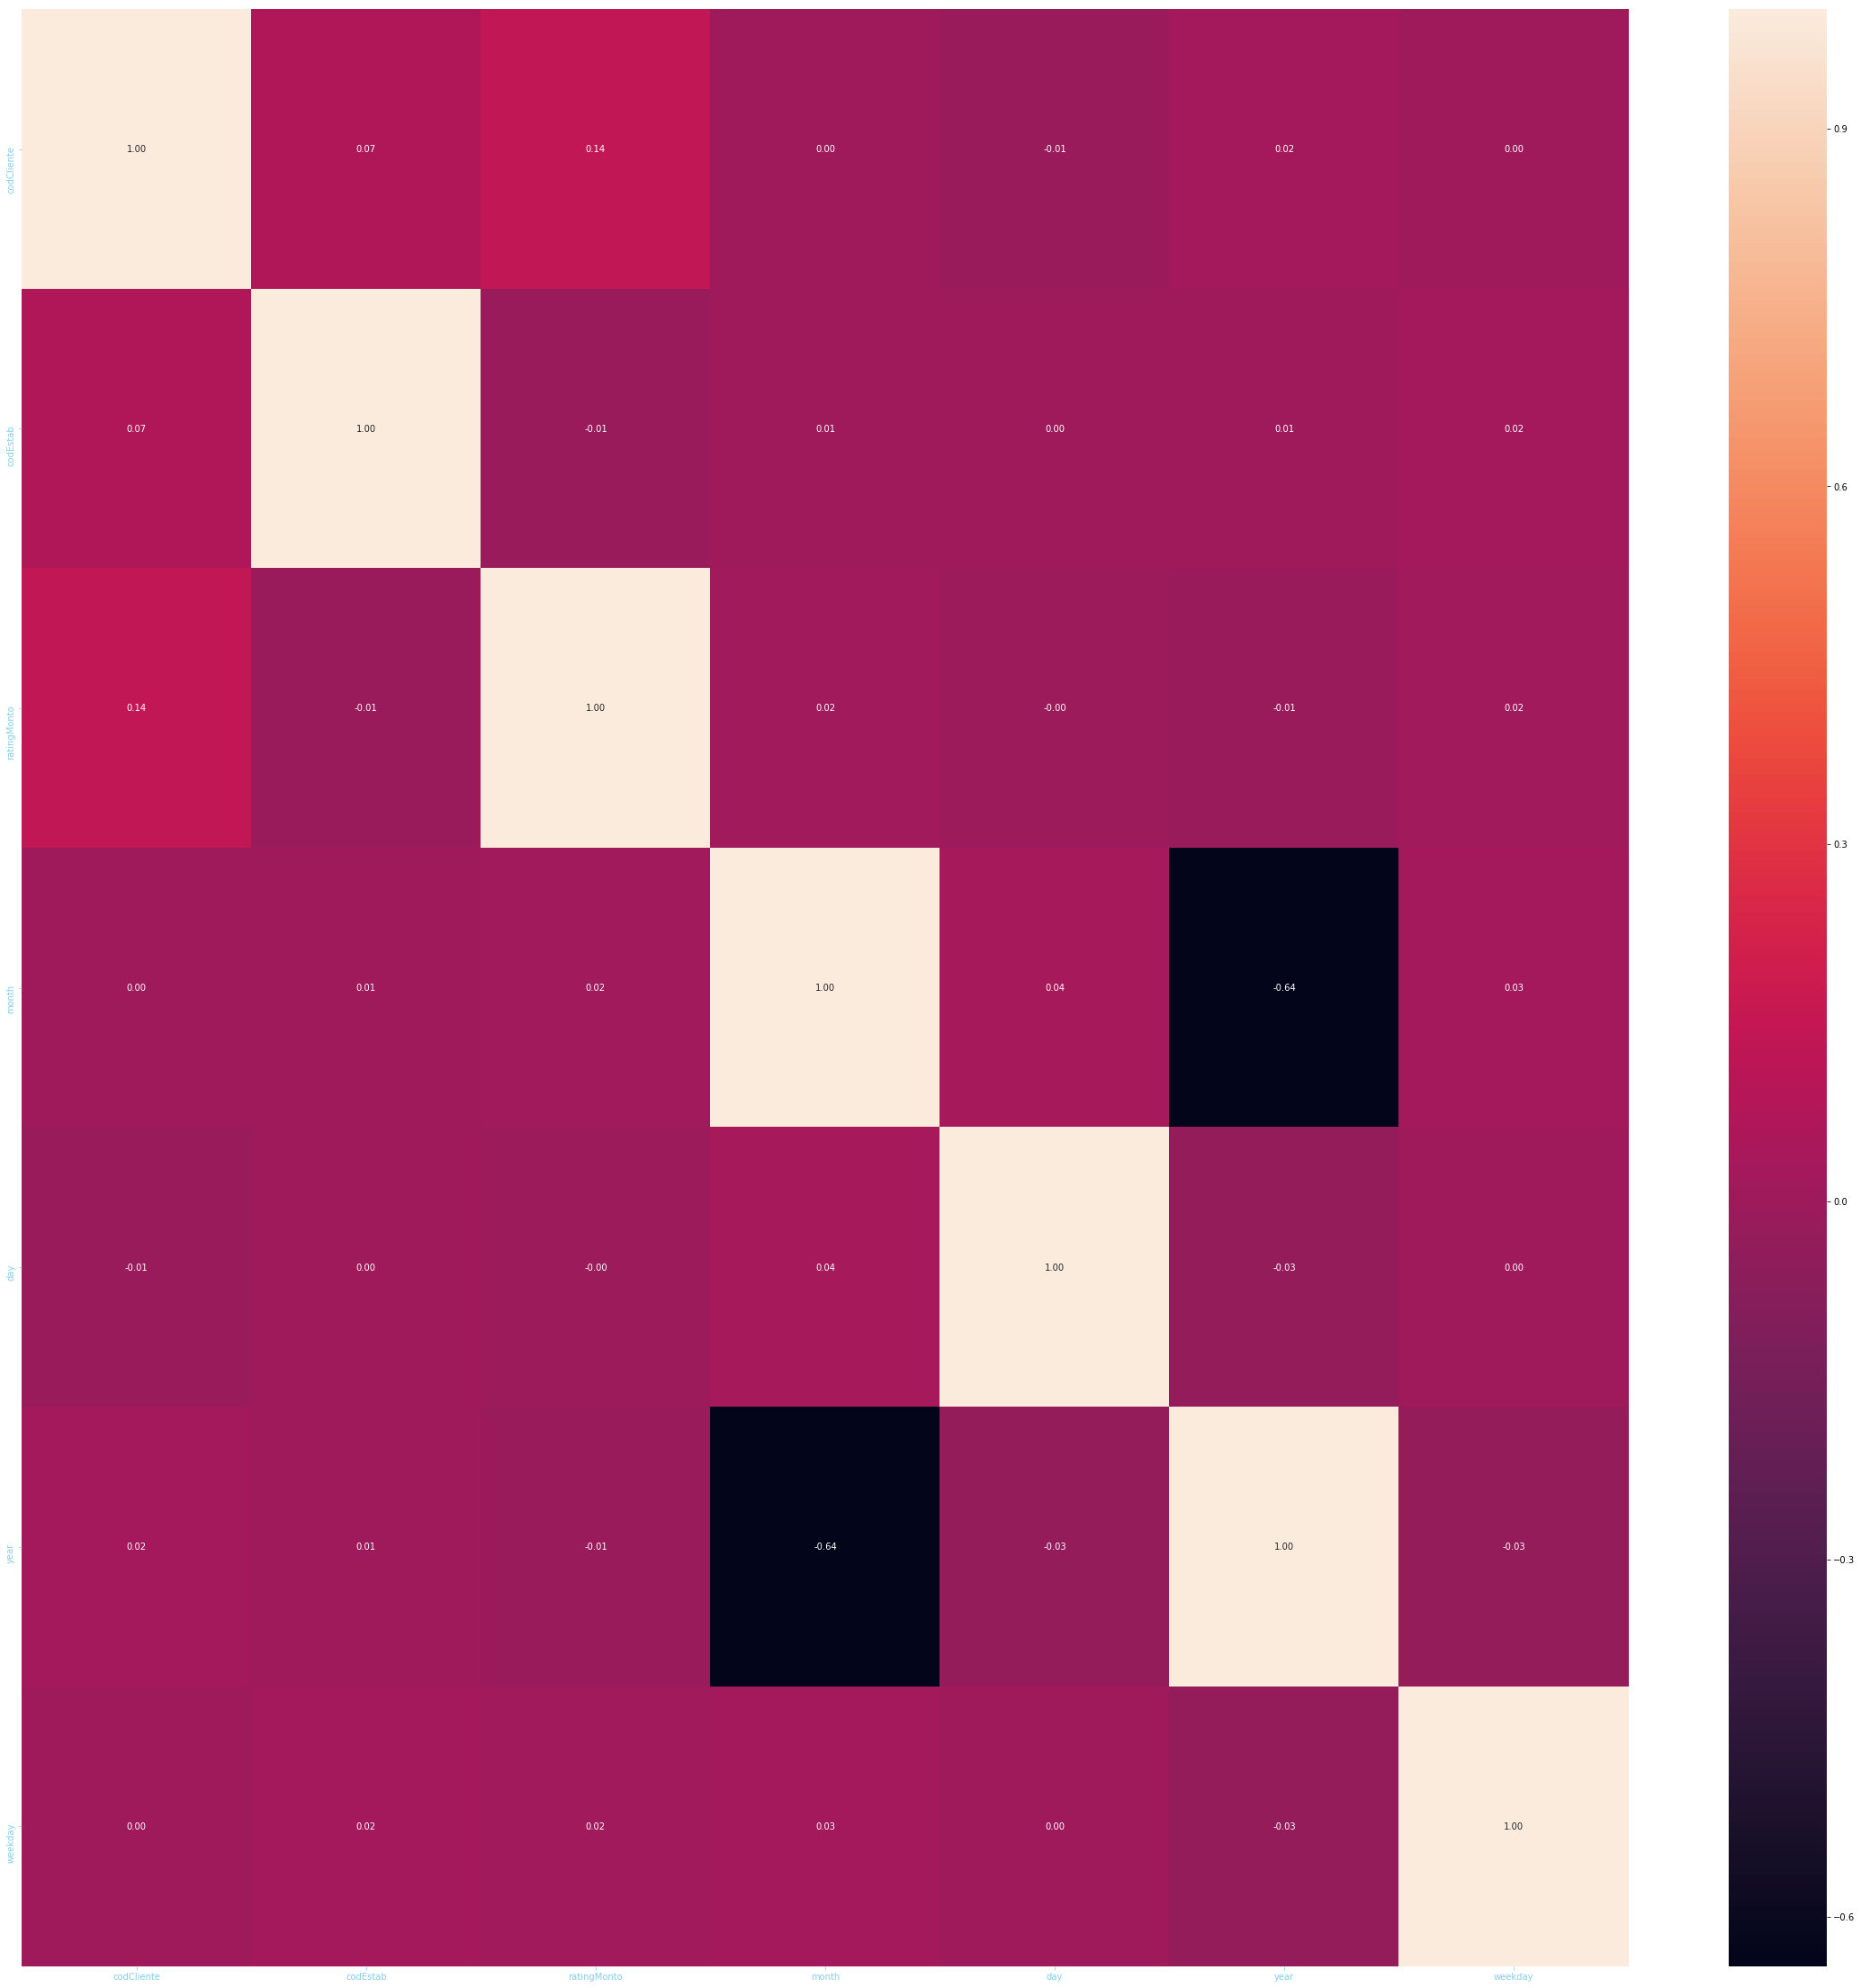

In [92]:
fig, ax = plt.subplots(figsize=(40, 40))
graf = sns.heatmap(data_train.corr('spearman'), annot=True, fmt=".2f", ax=ax)
graf.xaxis.label.set_color('skyblue')
graf.yaxis.label.set_color('skyblue')
graf.tick_params(colors='skyblue')
graf.figure.savefig("img/corr_train.png")

In [94]:
data_train.columns

Index(['codCliente', 'codEstab', 'ratingMonto', 'month', 'day', 'year',
       'weekday'],
      dtype='object')

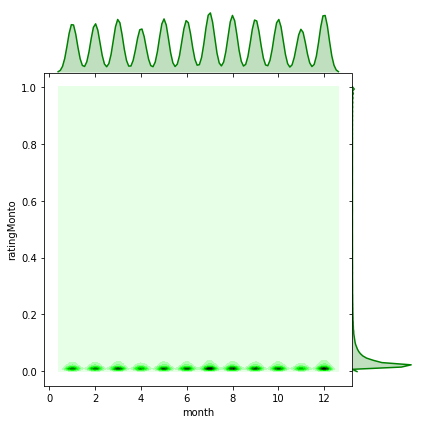

In [95]:
 sns.jointplot("month", "ratingMonto", data=data_train, kind="kde", space=0, color="g")

month    0.007585
dtype: float64


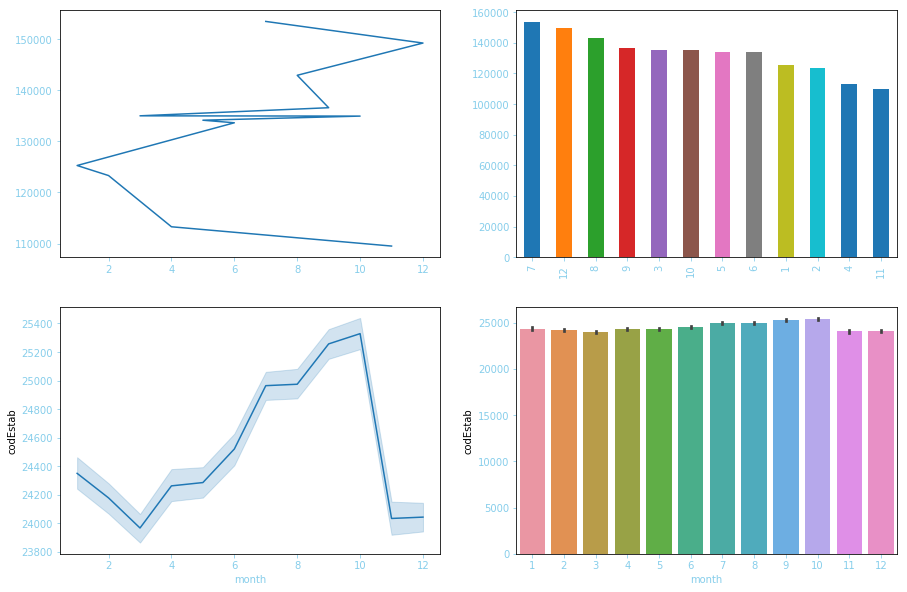

In [30]:
graphs_analysis(data_train, 'month', 'codEstab', color_label='skyblue', dropna=False)

weekday    0.021601
dtype: float64


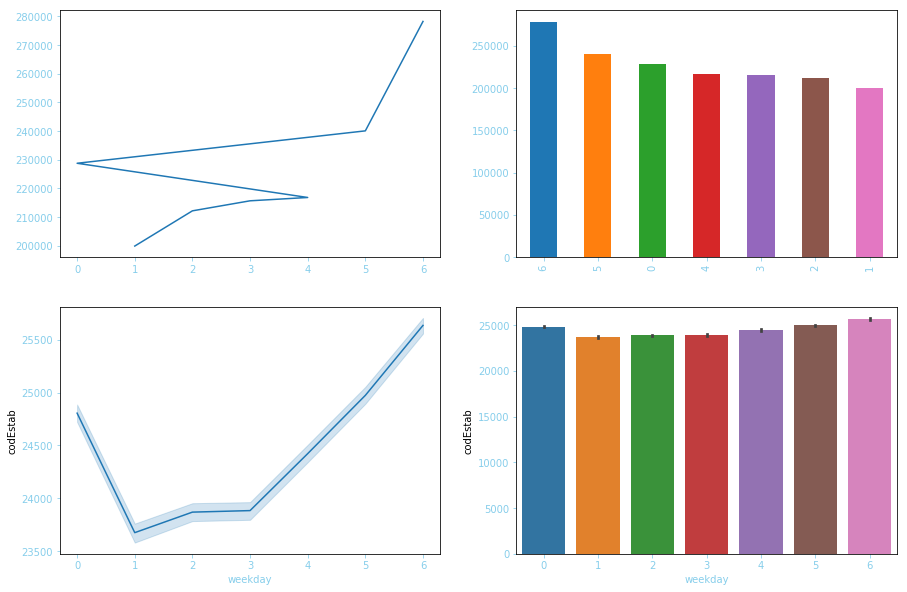

In [31]:
graphs_analysis(data_train, 'weekday','codEstab', color_label='skyblue', dropna=False)

weekday    0.006612
dtype: float64


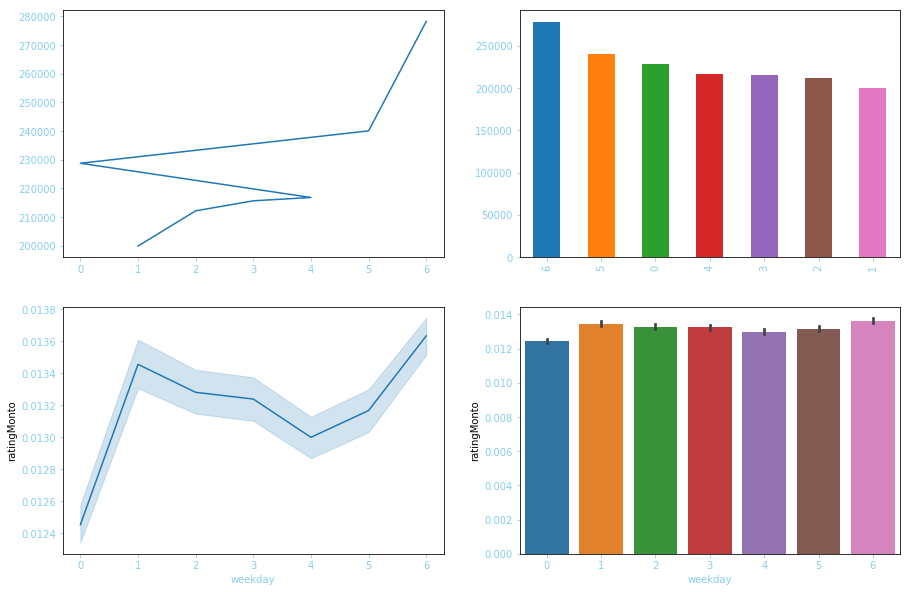

In [19]:
graphs_analysis(data_train, 'weekday', 'ratingMonto', color_label='skyblue', dropna=False)

In [130]:
#data['month'].value_counts(dropna=False)
estab_month = pd.DataFrame(data_train.groupby(by=['codEstab'])['month'].agg(pd.Series.mode))
estab_month.head()

,month
codEstab,
1,9
2,3
3,"[11, 12]"
4,11
5,12


In [139]:
def clean_mode(x):
    if str(x).isdigit():
        return int(x)
    else:
        list_mode = list((x))
        if 7 in list_mode:
            return 7
        elif 12 in list_mode:
            return 12
        return max(list_mode)

estab_month['month'] = estab_month['month'].apply(clean_mode)

In [142]:
del estab_month.index.name
estab_month['codEstab'] = estab_month.index
estab_month['bes_motnth'] = estab_month['month']
del estab_month['month']
estab_month.head(10)

,codEstab,bes_motnth
1,1,9
2,2,3
3,3,12
4,4,11
5,5,12
6,6,3
7,7,7
8,8,2
9,9,9
10,10,12


In [145]:
data_estab = data_estab.merge(estab_month, on='codEstab')
data_estab.head()

,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant,bes_motnth
0,1,0,0,0.058234,0.058234,0.01822,0.01822,9
1,2,0,0,0.058234,0.058234,0.01822,0.01822,3
2,14,0,0,0.058234,0.058234,0.01822,0.01822,7
3,24,0,0,0.058234,0.058234,0.01822,0.01822,7
4,25,0,0,0.058234,0.058234,0.01822,0.01822,3


In [155]:
data_estab['bes_motnth'] = data_estab['bes_motnth'].astype(str)

In [156]:
data_estab.dtypes

codEstab               int64
flagLimaProvEstab      int64
ubigeoEstab            int64
estab_popularity     float64
giro_popularity      float64
estab_rant           float64
giro_rant            float64
bes_motnth            object
dtype: object

In [157]:
data_estab = pd.get_dummies(data_estab)
data_estab.head()

,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant,bes_motnth_1,bes_motnth_10,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0
2,14,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
3,24,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
4,25,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0


In [158]:
from utils import *
data_estab = reduce_size_data(data_estab, category=False, default='integer')
data_estab.dtypes

Tamaño de uso actual :  5.388034820556641 MB
-> Int 64 Detected
     codEstab
     flagLimaProvEstab
     ubigeoEstab
-> Float 64 Detected
     estab_popularity
     giro_popularity
     estab_rant
     giro_rant
Tamaño de uso final :  4.182816505432129 MB


codEstab               int32
flagLimaProvEstab       int8
ubigeoEstab            int16
estab_popularity     float64
giro_popularity      float64
estab_rant           float64
giro_rant            float64
bes_motnth_1           uint8
bes_motnth_10          uint8
bes_motnth_11          uint8
bes_motnth_12          uint8
bes_motnth_2           uint8
bes_motnth_3           uint8
bes_motnth_4           uint8
bes_motnth_5           uint8
bes_motnth_6           uint8
bes_motnth_7           uint8
bes_motnth_8           uint8
bes_motnth_9           uint8
dtype: object

In [203]:
data_estab.head()

,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant,bes_motnth_1,bes_motnth_10,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0
2,14,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
3,24,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
4,25,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0


In [204]:
data_estab.to_csv('data/clean_estab.csv', index=False)

In [160]:
data_train.head()

,codCliente,codEstab,ratingMonto,month,day,year,weekday
0,7649,43629,0.014072,1,29,2017,0
1,24604,4326,0.001667,12,1,2016,4
2,15289,4326,0.000127,6,1,2017,4
3,5190,59776,0.001167,9,22,2017,5
4,16635,31043,0.047386,5,5,2017,5


In [162]:
del data_train['weekday']
del data_train['month']
del data_train['day']

In [163]:
data_train.head()

,codCliente,codEstab,ratingMonto,year
0,7649,43629,0.014072,2017
1,24604,4326,0.001667,2016
2,15289,4326,0.000127,2017
3,5190,59776,0.001167,2017
4,16635,31043,0.047386,2017


In [165]:
data_train.shape, data_estab.shape

((1591617, 4), (74339, 19))

In [168]:
data_train_2016 = data_train[
    ['codCliente', 'codEstab', 'ratingMonto']
][data_train['year'] == 2016].sort_values(by=['codCliente', 'codEstab']).reset_index()

data_train_2017 = data_train[
    ['codCliente', 'codEstab', 'ratingMonto']
][data_train['year'] == 2017].sort_values(by=['codCliente', 'codEstab']).reset_index()

In [170]:
data_train_2016.shape, data_train_2017.shape, data_train_2016.shape[0] + data_train_2017.shape[0]

((258792, 4), (1332825, 4), 1591617)

In [171]:
del data_train_2016['index']
del data_train_2017['index']

In [172]:
data_train_2016.head()

,codCliente,codEstab,ratingMonto
0,1,1194,0.031735
1,1,2425,0.012931
2,1,4311,0.008188
3,1,40261,0.013214
4,2,37,0.016731


In [173]:
data_train_2017.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.084590
1,1,39,0.098481
2,1,39,0.018126
3,1,39,0.018183
4,1,1911,0.119995


In [174]:
data_train_2017 = pd.DataFrame(
    data_train_2017.groupby(by=['codCliente', 'codEstab'])['ratingMonto'].sum()
)

In [175]:
data_train_2017.head()

ratingMonto
codCliente codEstab             
1          39           0.219380
           1911         0.119995
           2399         0.009543
           2425         0.011858
           3843         0.146084

In [176]:
data_train_2017.columns

Index(['ratingMonto'], dtype='object')

In [177]:
data_train_2017['fusion'] = data_train_2017.index

In [178]:
data_train_2017.head()

ratingMonto     fusion
codCliente codEstab                        
1          39           0.219380    (1, 39)
           1911         0.119995  (1, 1911)
           2399         0.009543  (1, 2399)
           2425         0.011858  (1, 2425)
           3843         0.146084  (1, 3843)

In [179]:
data_train_2017 = data_train_2017.reset_index()
data_train_2017['codCliente'] = data_train_2017['fusion'].apply(lambda x: x[0])
data_train_2017['codEstab'] = data_train_2017['fusion'].apply(lambda x: x[1])
del data_train_2017['fusion']
data_train_2017.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.219380
1,1,1911,0.119995
2,1,2399,0.009543
3,1,2425,0.011858
4,1,3843,0.146084


In [180]:
data_train_2017.shape

(776997, 3)

In [181]:
data_train_2016 = pd.DataFrame(
    data_train_2016.groupby(by=['codCliente', 'codEstab'])['ratingMonto'].sum()
)
data_train_2016['fusion'] = data_train_2016.index
data_train_2016 = data_train_2016.reset_index()
data_train_2016['codCliente'] = data_train_2016['fusion'].apply(lambda x: x[0])
data_train_2016['codEstab'] = data_train_2016['fusion'].apply(lambda x: x[1])
del data_train_2016['fusion']
data_train_2016.head()

,codCliente,codEstab,ratingMonto
0,1,1194,0.031735
1,1,2425,0.012931
2,1,4311,0.008188
3,1,40261,0.013214
4,2,37,0.016731


In [182]:
data_train_2016.shape

(199990, 3)

In [183]:
data_train = pd.merge(
    data_train_2016, data_train_2017, on=['codCliente','codEstab'], how='outer'
).sort_values(
    by=['codCliente','codEstab']
).reset_index().drop(['index'], axis=1)
data_train.head()

,codCliente,codEstab,ratingMonto_x,ratingMonto_y
0,1,39,NaN,0.219380
1,1,1194,0.031735,NaN
2,1,1911,NaN,0.119995
3,1,2399,NaN,0.009543
4,1,2425,0.012931,0.011858


In [184]:
null_verificator(data_train)

,Nulos,Cantidad,Tipo Col
codCliente,False,0,int64
codEstab,False,0,int64
ratingMonto_x,True,701977,float64
ratingMonto_y,True,124970,float64


In [185]:
data_train.fillna(0, inplace=True)

In [186]:
null_verificator(data_train)

'DATA LIMPIA DE NULOS'

In [187]:
data_train['ratingMonto'] = (data_train['ratingMonto_x'] + data_train['ratingMonto_y']) / 2

In [189]:
data_train.head()

,codCliente,codEstab,ratingMonto_x,ratingMonto_y,ratingMonto
0,1,39,0.000000,0.219380,0.109690
1,1,1194,0.031735,0.000000,0.015868
2,1,1911,0.000000,0.119995,0.059998
3,1,2399,0.000000,0.009543,0.004772
4,1,2425,0.012931,0.011858,0.012395


In [190]:
minn = data_train['ratingMonto'].min()
maxx = data_train['ratingMonto'].max()
minn, maxx

(1.4924526668636705e-06, 0.5)

In [191]:
data_train['ratingMonto_norm'] = data_train['ratingMonto'].apply(lambda x: (x- minn)/(maxx - x))

In [192]:
data_train.head()

,codCliente,codEstab,ratingMonto_x,ratingMonto_y,ratingMonto,ratingMonto_norm
0,1,39,0.000000,0.219380,0.109690,0.281029
1,1,1194,0.031735,0.000000,0.015868,0.032772
2,1,1911,0.000000,0.119995,0.059998,0.136354
3,1,2399,0.000000,0.009543,0.004772,0.009632
4,1,2425,0.012931,0.011858,0.012395,0.025417


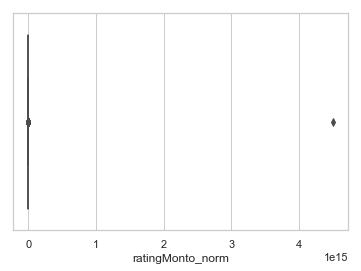

In [198]:
sns.set(style="whitegrid")
sns.boxplot(x=data_train["ratingMonto_norm"])

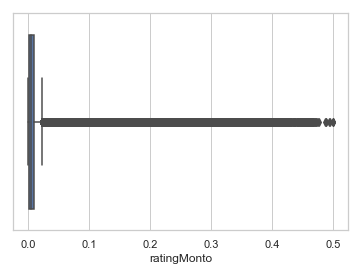

In [199]:
sns.boxplot(x=data_train["ratingMonto"])

In [200]:
del data_train['ratingMonto_x']
del data_train['ratingMonto_y']

In [201]:
data_train.head()

,codCliente,codEstab,ratingMonto,ratingMonto_norm
0,1,39,0.109690,0.281029
1,1,1194,0.015868,0.032772
2,1,1911,0.059998,0.136354
3,1,2399,0.004772,0.009632
4,1,2425,0.012395,0.025417


In [202]:
data_train.to_csv('data/clean_train.csv', index=False)